<img style="float: left; margin-bottom: 1em" src="images/excelerate.png" width="200">
<img style="float: right; margin-bottom: 1em" src="images/surfsara.png" width="150">
<hr style="clear: both"/>

# Your first neural network
In this notebook you will build a small neural network to solve the classification problem introduced in the slides. You will see a number of terms appear that we have not yet discussed. We will introduce and explain these terms gradually during the day.

We will use Python and the deep learning library [Keras](https://keras.io/) for building our network. We do not expect you to write much code today, so do not worry if you do not know Python.

## Interacting with the notebook
This notebook consists of a number of cells. Each cell can be selected by clicking on it, and can be executed by clicking on the 'Run' icon on the top of the page, or by pressing **Shift + Enter**. Try it with the cell directly below:

In [ ]:
print('This is a Python cell')

## Loading the data
In the next cell, we load a subset of the [original data set](https://www.kaggle.com/emmarex/plantdisease) on plant disease classification. We have made the images smaller in order to keep the training time of the network manageable.

**Run the next cell**. A star symbol (\*) to the left of the cell indicates Python is executing the cell. A number will appear when it is finished. 

In [2]:
import keras
import lib

%config InlineBackend.figure_format = 'retina'

X, Y, labels = lib.dataset_plant_village_tomato_blight()
X.shape

Using TensorFlow backend.


(3500, 128, 128, 3)

Let's plot some of the images:

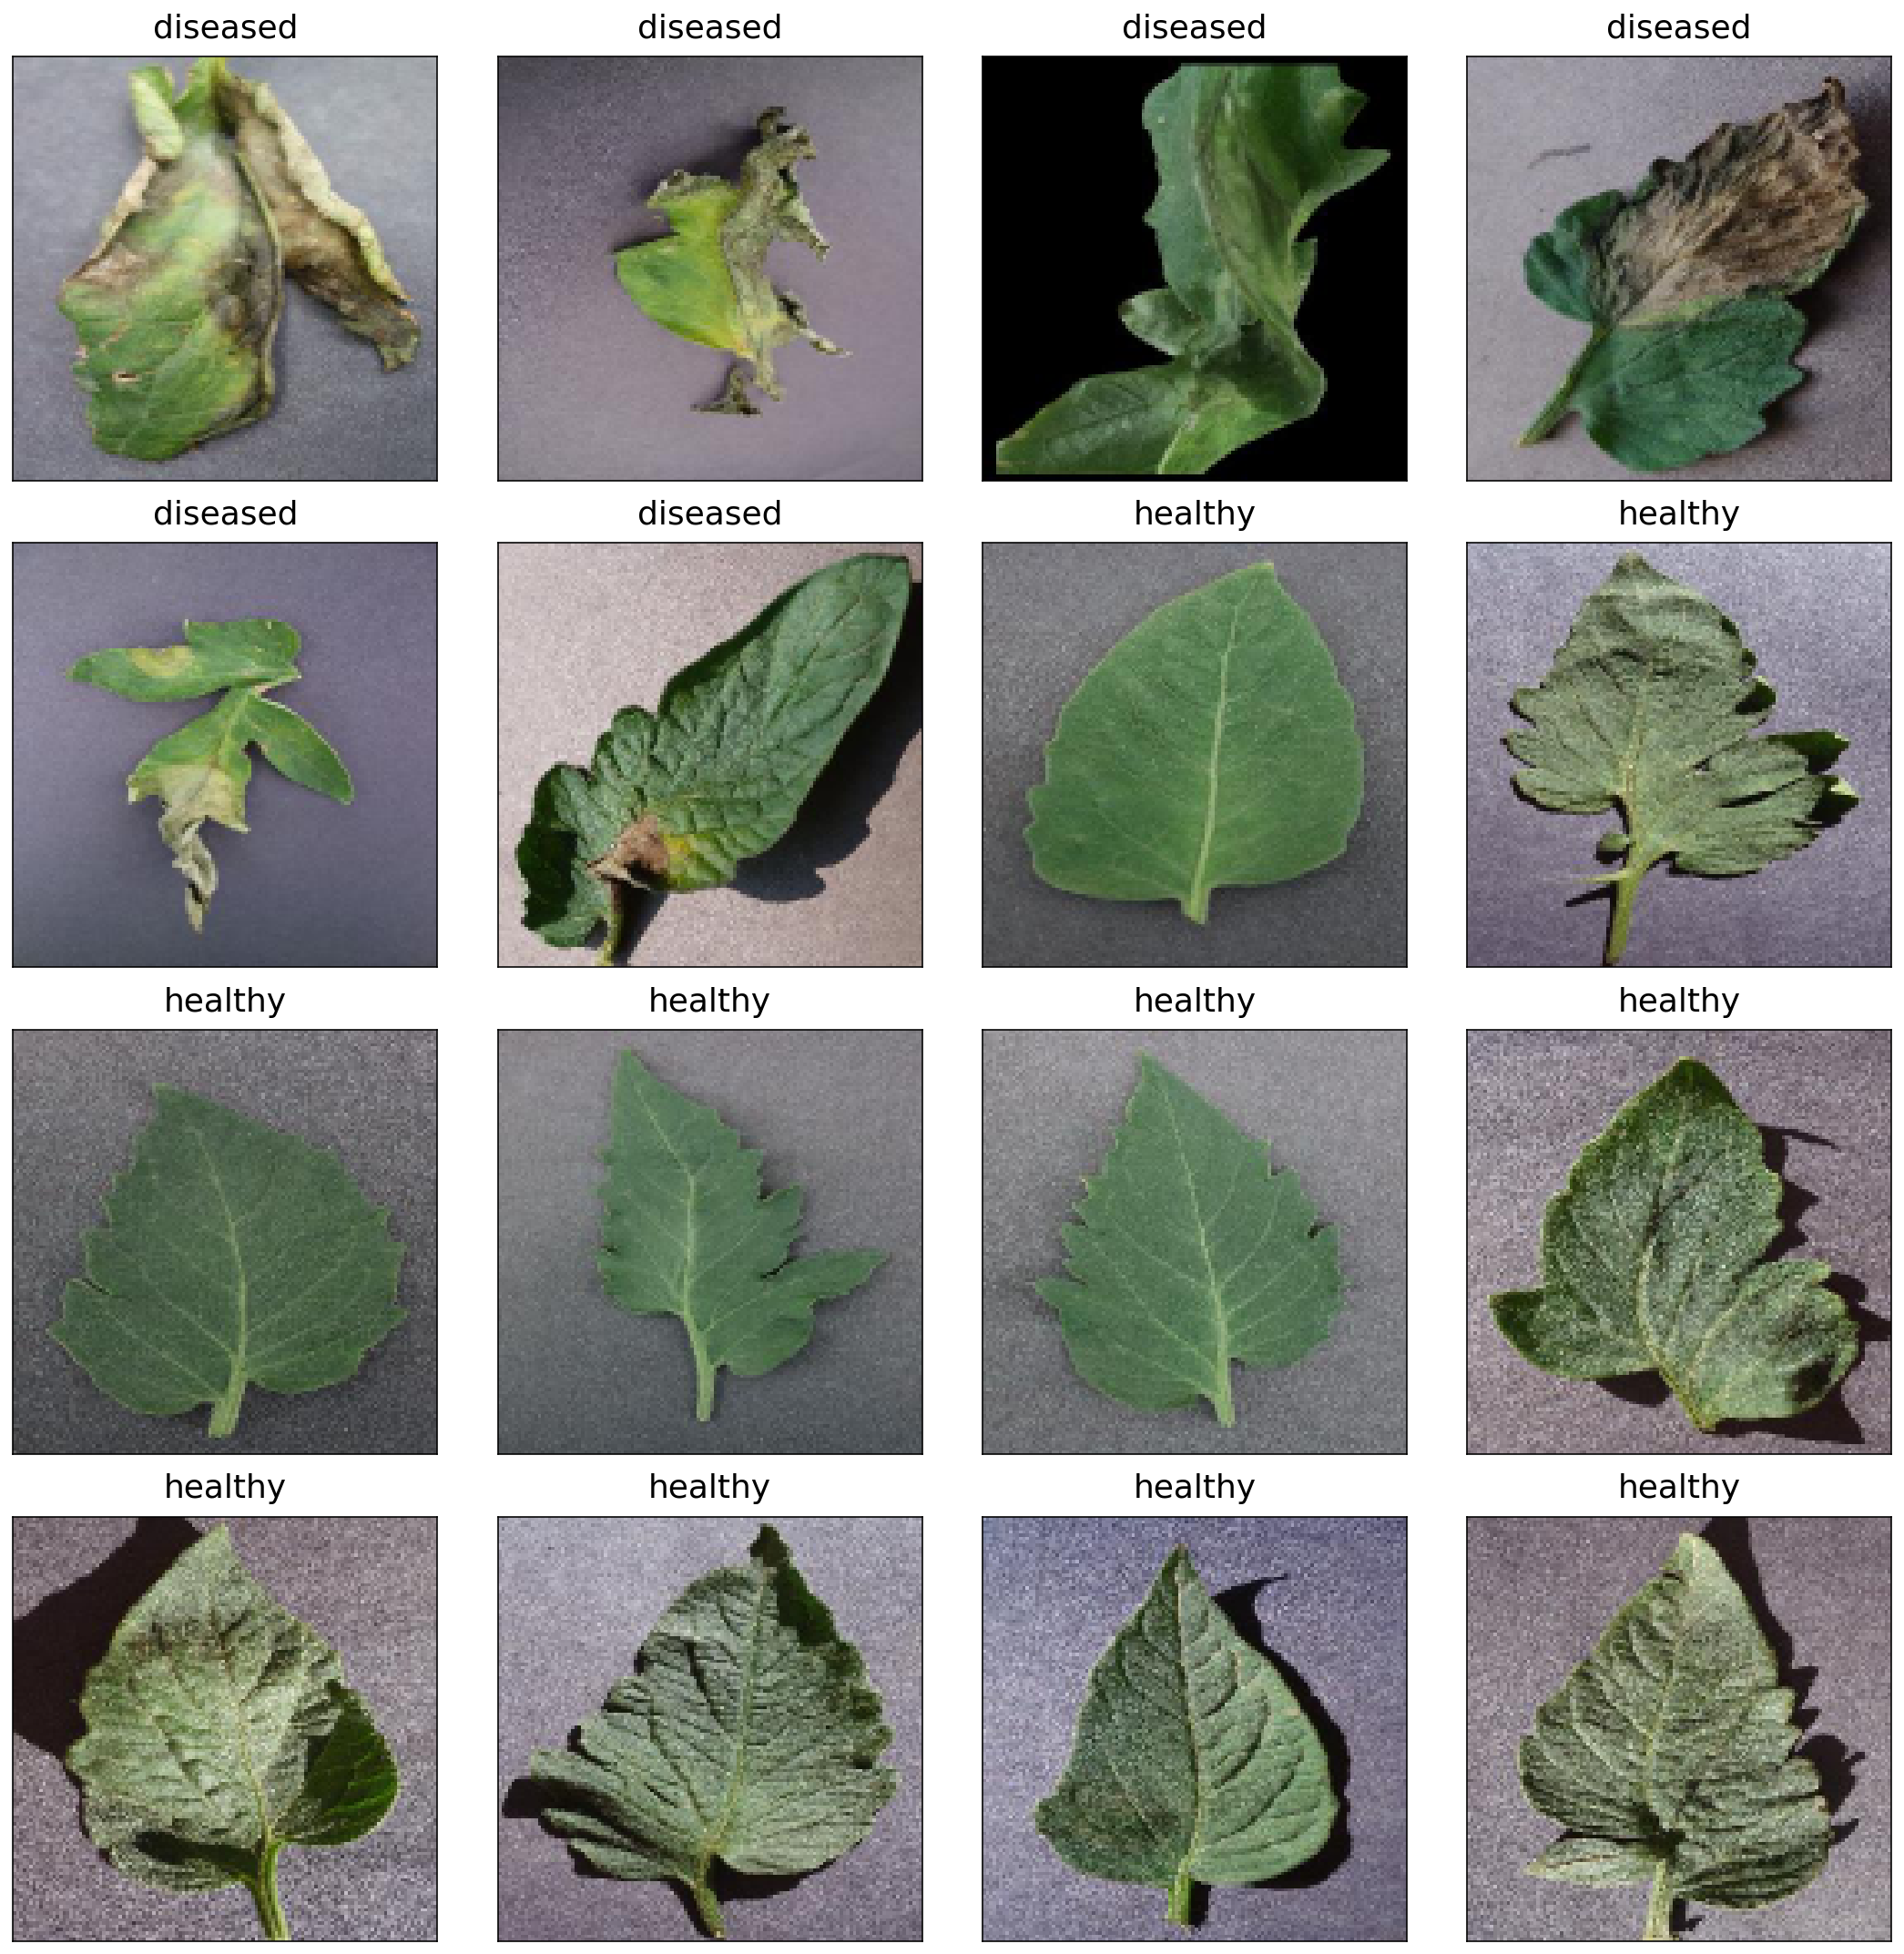

In [3]:
lib.plot_examples(X[:16], Y[:16], labels);

Healthy examples will have 'healthy' in the name, diseased examples the name of the disease. Some of the diseases will have an obvious effect. Others less so.

## Building a network
Let's build our first network! It will be a very simple network that will map the input images directly to the output classes.

We can define the network in Keras in a few lines of Python code. The next cell will build the network, or model, and show a summary of the network's layers and parameters. We will explain a few things about this network in the cell below.

**Run the next cell.**

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(2, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 98306     
Total params: 98,306
Trainable params: 98,306
Non-trainable params: 0
_________________________________________________________________


We have built a **sequential model** where data flows through the model from left to right: from input to output. The first layer is a `Flatten` layer, which will convert our 2D data into 1D data. This is a prerequisite for working with dense layers.

The second layer is a `Dense` layer with two elements. The first element will correspond to the 'diseased' class, the second to the 'normal' class.

Finally, we have an `Activation` layer with **softmax** activation. This layer applies a particular non-linear transformation to its inputs (the outputs of the dense layer), and makes sure that the output can be interpreted as a probability distribution.

## Training the network
In the next cell we **compile** the model with an optimizer. This optimizer is responsible for **training** the network. We will use an optimizer called Adam, which is quite robust and performant.

After compiling the model, we train the model for a number of **epochs**. Each **epoch** the entire data set is sent through the network in a number of **batches**. After each batch, Keras updates the network to improve its performance.

**Run the next cell, and read the cell below while it is training.**

In [5]:
from keras.optimizers import Adam

model.compile(
    Adam(lr=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(X, Y, epochs=25, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
3500/3500 [==============================] - 1s 306us/step - loss: 0.6972 - acc: 0.6417
Epoch 2/25
3500/3500 [==============================] - 1s 259us/step - loss: 0.4694 - acc: 0.8031
Epoch 3/25
3500/3500 [==============================] - 1s 260us/step - loss: 0.4097 - acc: 0.8306
Epoch 4/25
3500/3500 [==============================] - 1s 252us/step - loss: 0.3593 - acc: 0.8740
Epoch 5/25
3500/3500 [==============================] - 1s 262us/step - loss: 0.3249 - acc: 0.8926
Epoch 6/25
3500/3500 [==============================] - 1s 263us/step - loss: 0.2928 - acc: 0.9057
Epoch 7/25
3500/3500 [==============================] - 1s 271us/step - loss: 0.2756 - acc: 0.9060
Epoch 8/25
3500/3500 [==============================] - 1s 258us/step - loss: 0.2577 - acc: 0.9223
Epoch 9/25
3500/3500 [==============================] - 1s 264us/step - loss: 0.2569 - acc: 0.9151
Epoch 10/25
3500/3500 [==============================] - 1s 2

### Loss and accuracy
While the network is training Keras will display some information about the progress. It will show the **loss** of the network and the **accuracy**.

The loss is the error of the network: after each batch of data Keras will calculate 'how wrong' the network prediction is compared to the actual label. By modifying the parameters of the network Keras will try to minimize the loss.

Since the loss is not easily interpretable we typically have a domain-specific or problem-specific **metric** to tell us how the current network performs. Since this is a classification problem, we can look at the **accuracy**. The accuracy is simply the proportion of percentage of images that are classified correctly. When it is 1 (or 100%), the network has perfectly classified all instances in the data set.

### Training time
Training a network can be quite time-consuming. We have defined a very simple network with a small data set. More complex problems with more data and more complex or larger images or data items, can take hours or days to train, even on a GPU.

## Evaluating the network
Keras has provided us with some updates on the network loss and accuracy during training, so we already have some sense of how our network performs.

Let's plot the loss and accuracy during our training process and get a final estimate of our performance:

3500/3500 [==============================] - 1s 207us/step
Final loss of model:     0.1392
Final accuracy of model: 0.9640 (error rate: 3.60%)


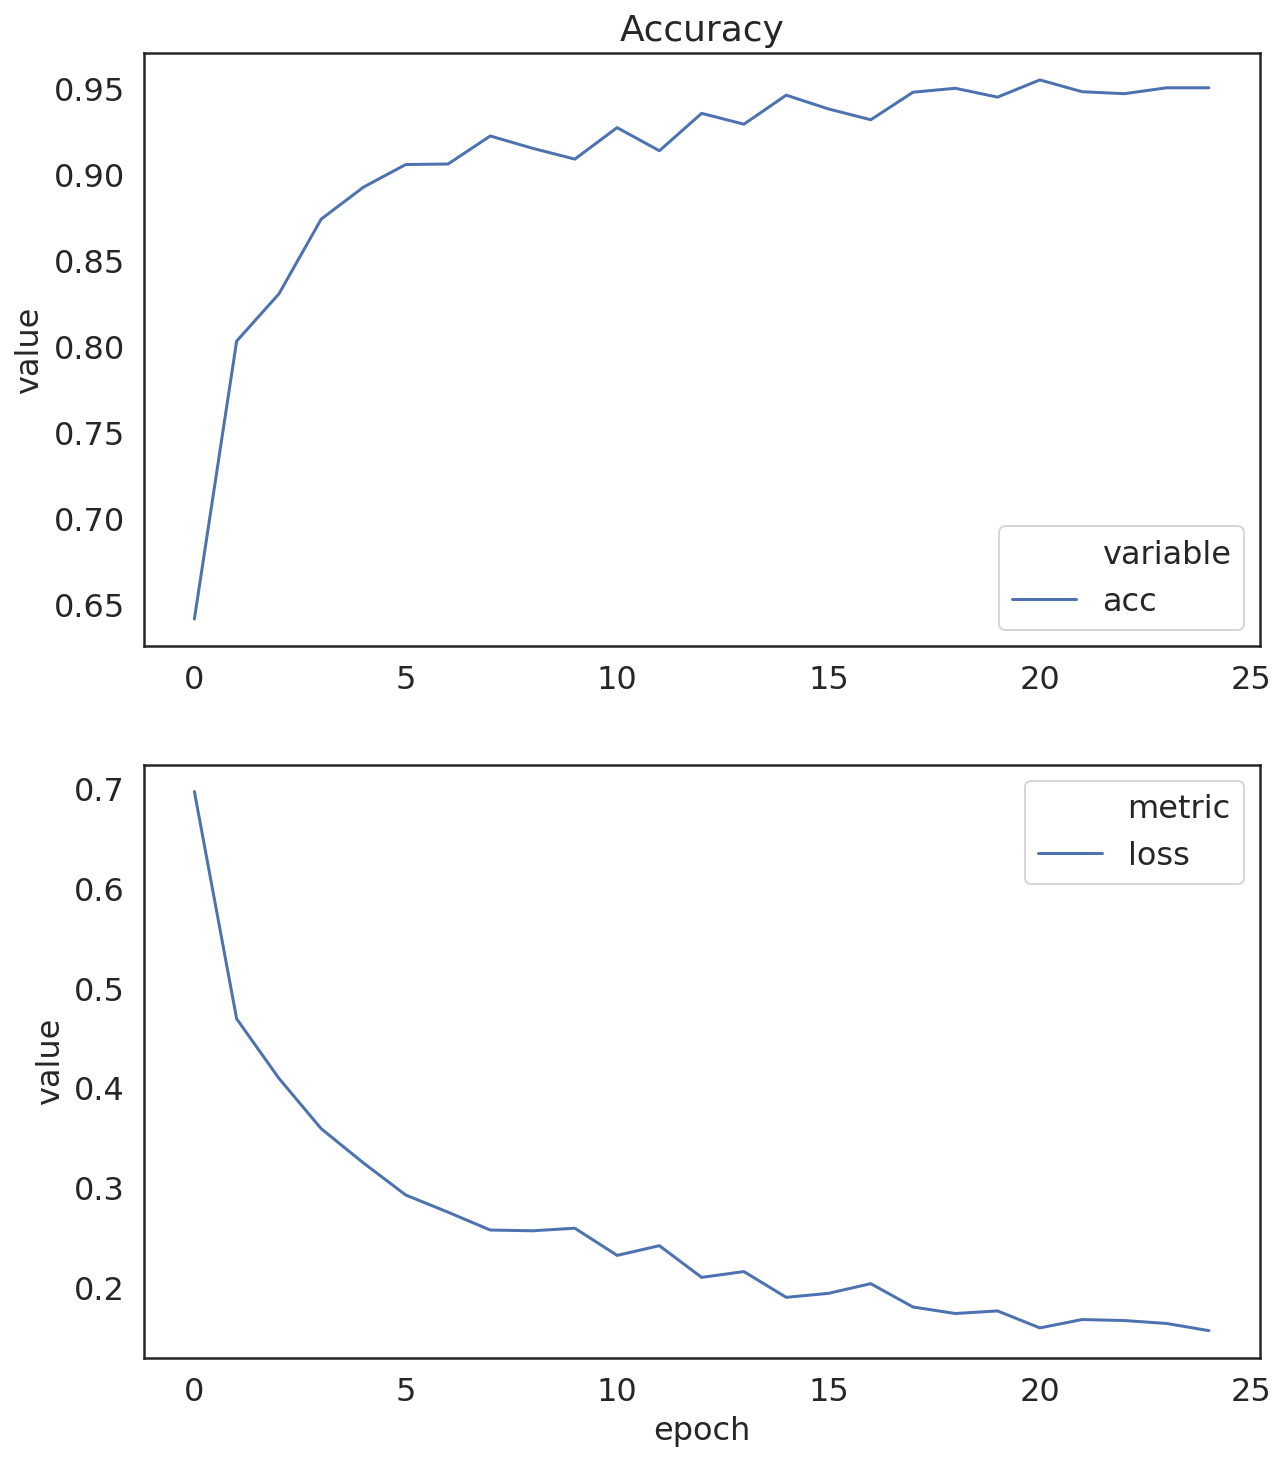

In [6]:
lib.plot_history(history)

loss, accuracy = model.evaluate(X, Y, verbose=True)
print('Final loss of model:     {:.4f}'.format(loss))
print('Final accuracy of model: {:.4f} (error rate: {:.2f}%)'.format(accuracy, (1 - accuracy) * 100))

There is always a small degree of randomness involved in all deep learning computations. As a consequence, your resulting loss and accuracy may vary. For this problem, our test runs were around 0.95 accuracy.

## Inspecting the network internals
Although the network performs quite well, we can improve its performance even more. Before we do that, it may help us to know how the network comes to a classification. One way of doing this is by generating an image that would give us a maximal **activation** with respect to an output class. Remember: neural networks build feature detectors that activate on a given input.

With some tricks from the [keras-vis](https://github.com/raghakot/keras-vis) package we can generate an image for the diseased and healthy class, each of which will maximally activate for that image:

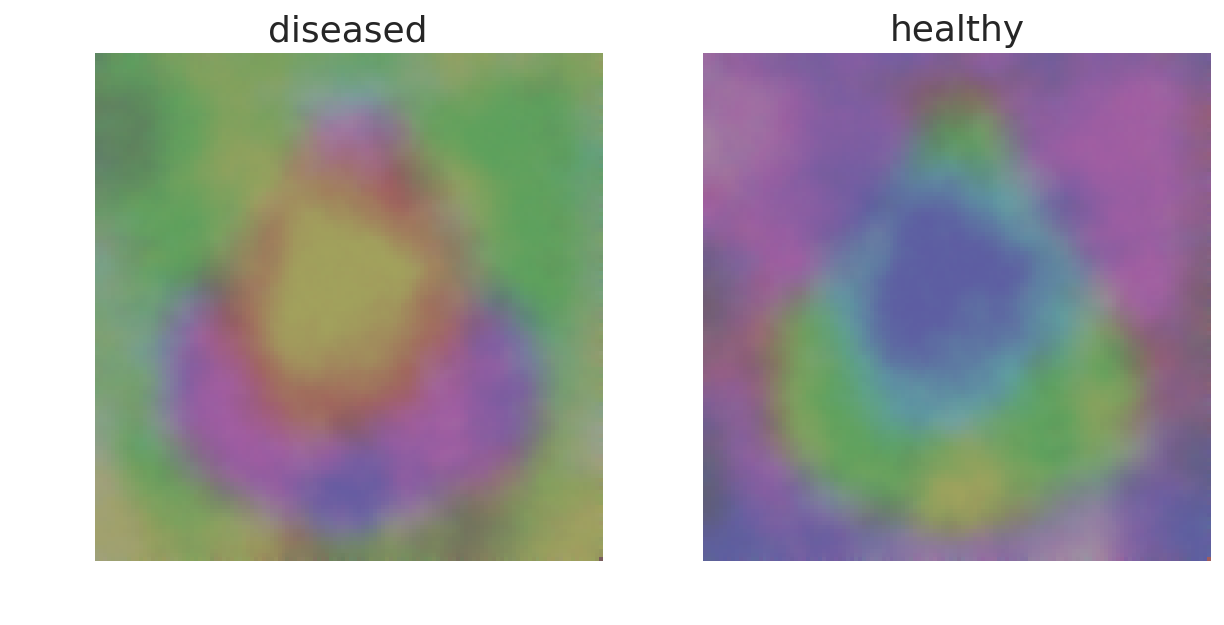

In [7]:
lib.plot_activations_twoclass(model, labels);

To reiterate: on the left we have the ideal input image for the network to maximally predict the diseased class. On the right the ideal input image to predict a healthy leaf.

Although the network performs quite well, it is still a very simple network directly mapping the input to the output without any hidden layers. As such, these images look a bit strange. We can still see the outline of a leaf in both cases, though.

Also, we can figure out that if the network detects some pink area around the edges of the leaf, the network will classify the leaf as diseased. Since pink is made up of red and yellow, this makes quite a lot of sense given the data set. Conversely, if the edges of the leaf are green (or turquoise, a mixture of green and blue), the network will predict the leaf as healthy.

## Exercise 1: improving network performance
We have built a very primitive network. In practice, we will build networks with many hidden layers instead of directly mapping input to output. In the cell below we have added a hidden layer to the original network. It is still quite small, with only a few units in the hidden layer. Still, it will improve our performance quite a bit.

**Improve the accuracy of the model to .97 or higher by increasing the number of units in the hidden layer.**

**Note: try to keep the number of units in the hidden layer smaller than 256, to keep training time manageable.**

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(<FILL IN>, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25, batch_size=32)

In [8]:
# SOLUTION

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(192, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               9437376   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 386       
Total params: 9,437,762
Trainable params: 9,437,762
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
3500/3500 [==============================] - 9s 2ms/step - loss: 0.7716 - acc: 0.6480
Epoch 2/25
3500/3500 [==============================] - 8s 2ms/step - loss: 0.3819 - acc: 0.8571
Epoch 3/25
3500/3500 [==============================] - 8s 2ms/step - loss: 0.2893 - acc: 0.9097
Epoch 4/25
3500/3500 [==============================] - 8s 2ms/step - loss: 0.2344 - acc: 0.9240
Epoch 5/

## Exercise 2
When you are happy with the result, run the following cell to obtain the final accuracy of the model and the activation maps.

**What is the difference in performance, and why? Do you see any changes in the activation maps? Write down your answer in the cell at the bottom of the notebook.**

3500/3500 [==============================] - 1s 334us/step
Final loss of model:     0.0424
Final accuracy of model: 0.9937 (error rate: 0.63%)


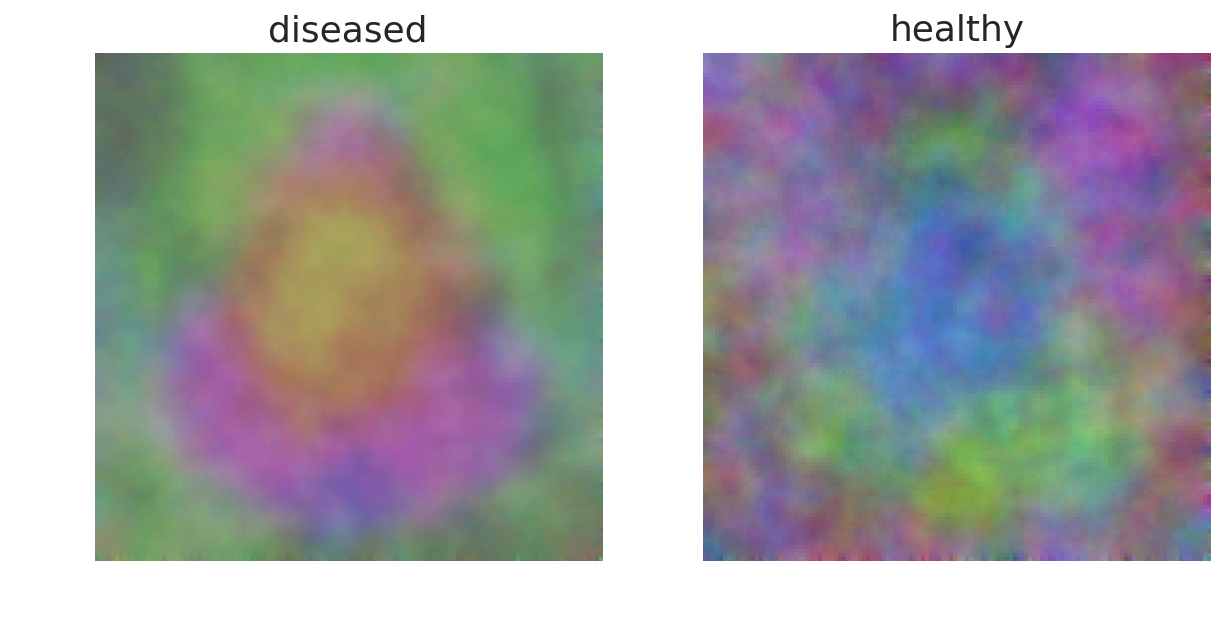

In [9]:
loss, accuracy = model.evaluate(X, Y, verbose=True)
print('Final loss of model:     {:.4f}'.format(loss))
print('Final accuracy of model: {:.4f} (error rate: {:.2f}%)'.format(accuracy, (1 - accuracy) * 100))

lib.plot_activations_twoclass(model, labels);

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: naturally, we have very few misclassifications because we have increased the capacity of the model, allowing it to model more complex problems. The activations are a bit more noisy than in exercise 1, particularly for the healthy class. This is because we are **overfitting** on our data set (we can model it almost perfectly), and it will memorise almost all examples in our data set.